# 결정트리 (Decision Tree)
- penguins datasets

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 준비

In [122]:
penguins = pd.read_csv('penguins.csv')
penguins.shape

(344, 7)

In [123]:
df = penguins.copy()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [126]:
df.isna().sum(axis=0)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [127]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [128]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [129]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [130]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [131]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

#### 이상치

In [132]:
df.loc[df['sex']=='.', 'sex'] = np.nan

In [133]:
df[df['sex']=='.']['sex']

Series([], Name: sex, dtype: object)

#### 결측치

In [134]:
df.isna().sum(axis=0)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [135]:
df1 = df.copy()

In [136]:
cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [137]:
 # 첫번째
for col in cols:
  df1[col].fillna(df1[col].mean(), inplace=True)

In [138]:
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [139]:
# 두번째
from sklearn.impute import SimpleImputer

df2 = df.copy()

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(df2[cols])
df2[cols] = si.transform(df2[cols])

In [140]:
df2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [141]:
# 세번째

df3 = df.copy()
df3 = df3.dropna()

In [142]:
df3.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [143]:
df3.shape

(333, 7)

In [144]:
df = df2.copy()
df.shape

(344, 7)

In [145]:
df.isna().sum(axis=0)

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [146]:
# 성별 nan값 없애기
df = df.dropna()
df.shape

(333, 7)

### 2. 테스트 데이터 분리

In [147]:
x = df.drop('species', axis=1)
y = df['species']

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [149]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((266, 6), (67, 6), (266,), (67,))

In [150]:
x_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
243,Biscoe,46.3,15.8,215.0,5050.0,MALE
196,Dream,50.9,17.9,196.0,3675.0,FEMALE
275,Biscoe,45.0,15.4,220.0,5050.0,MALE
255,Biscoe,48.4,16.3,220.0,5400.0,MALE
164,Dream,47.0,17.3,185.0,3700.0,FEMALE


In [151]:
# island와 sex 칼럼을 one-hot encoding, 나머지는 scaling
cat_cols = ['island','sex']
num_cols = ['culmen_length_mm',	'culmen_depth_mm',	'flipper_length_mm',	'body_mass_g'	]

#### 원핫인코딩
- 범주형 변수 (순서가 없는)

In [152]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse_output=False) # 객체를 배열로 보여줌(?)
x_train_cat = oh.fit_transform(x_train[cat_cols])
x_train_cat

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

#### 표준화

In [153]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_num = ss.fit_transform(x_train[num_cols])

#### x_train_cat과 x_train_num을 합치자

In [154]:
# numpy array 합치기
x_train_s = np.concatenate((x_train_cat, x_train_num), axis=1)
x_train_s

array([[ 1.        ,  0.        ,  0.        , ..., -0.66210634,
         0.96084593,  1.00559581],
       [ 0.        ,  1.        ,  0.        , ...,  0.37943858,
        -0.42305699, -0.72990811],
       [ 1.        ,  0.        ,  0.        , ..., -0.86049585,
         1.32503091,  1.00559581],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.67702284,
         0.01396499, -0.47747117],
       [ 1.        ,  0.        ,  0.        , ...,  1.17299661,
        -0.131709  , -0.25658886],
       [ 0.        ,  1.        ,  0.        , ...,  0.62742547,
        -0.131709  , -1.07700889]])

#### y는 레이블 인코딩을 시키자.

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

### 3. 학습
- 베이스라인

In [156]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train_s, y_train)

DecisionTreeClassifier()

트리모양 그림 그리기

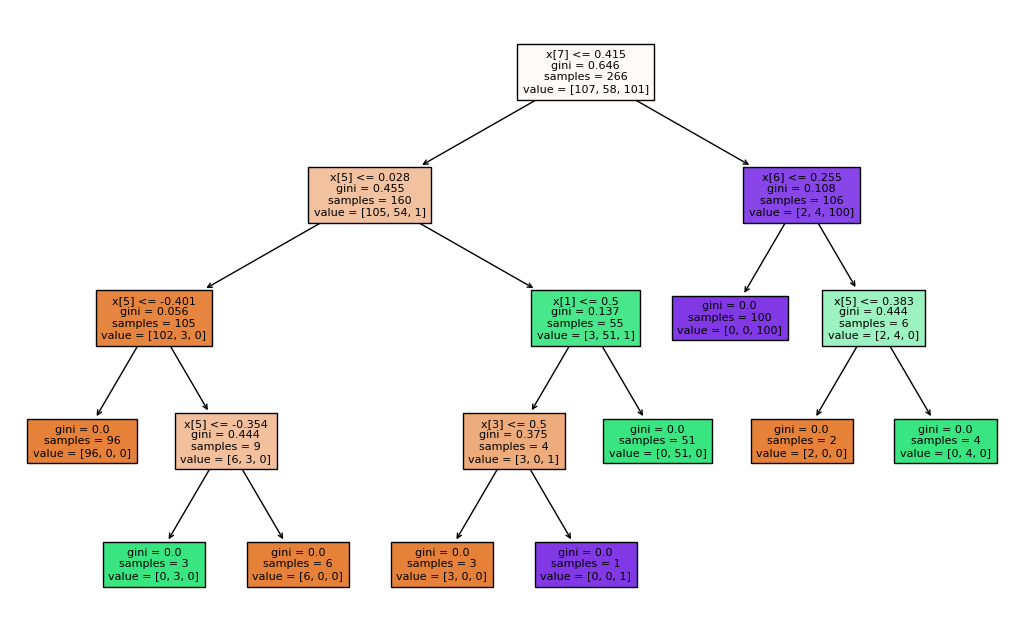

In [157]:
from sklearn.tree import plot_tree

plt.figure(figsize=(13, 8)) # 인치
plot_tree(clf, filled=True, fontsize=8)
plt.show()

#### 테스트 데이터 정확도

In [158]:
# 테스트 데이터 처리
# 예측 (predict)
# 정확도

In [159]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse_output=False) # 객체를 배열로 보여줌(?)
x_test_cat = oh.fit_transform(x_test[cat_cols])

In [160]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_test_num = ss.fit_transform(x_test[num_cols])

In [161]:
x_test_s = np.concatenate((x_test_cat, x_test_num), axis=1)
x_test_s

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.81096768, -0.16214792, -0.86906424, -0.51411537],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -1.16211117, -0.21932639, -0.86906424, -1.06039125],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         2.27539877, -0.9054681 ,  2.29695938,  1.97447478],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.70008026,  1.55320636, -0.52493124, -0.14993144],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.07171823,  0.40963684, -0.38727804, -0.08923412],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.1086807 ,  0.7527077 , -0.45610464, -0.39272072],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.12956213, -0.50521877,  0.09450817, -0.84795063],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0

In [162]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [163]:
y_pred = clf.predict(x_test_s)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2])

In [164]:
from sklearn.metrics import confusion_matrix

def print_cfm(y_test, y_pred):
  cfm = confusion_matrix(y_test, y_pred)
  cfm # 대각선이 실제값

  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar='False')
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

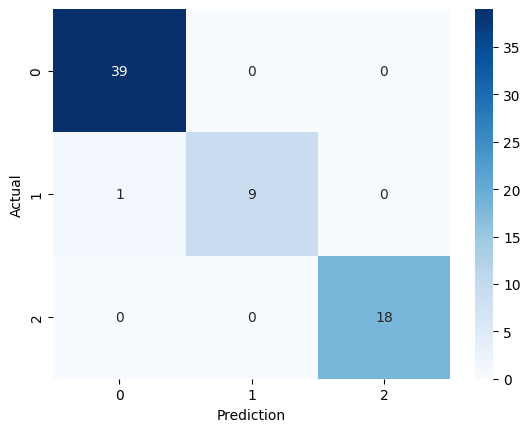

In [165]:
print_cfm(y_test, y_pred)

In [166]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9850746268656716

### 4. 튜닝

In [167]:
%%time
# 그리드 서치
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 4, 5],
    'max_leaf_nodes': [5, 6, 7, 8]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1) # n_jobs = -1 내 PC가 사용할 수 있는만큼 프로세스를 쓰겠다. 병렬처리 하겠다.
grid.fit(x_train_s, y_train)

CPU times: user 86 ms, sys: 45.7 ms, total: 132 ms
Wall time: 1.43 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_leaf_nodes': [5, 6, 7, 8]})

In [168]:
grid.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7}

In [169]:
grid.best_score_ # cv 5번 돌려서 평균을 낸 정확도

0.9812718378756115

In [170]:
grid.best_estimator_.score(x_test_s, y_test) # 가장 높은 걸 학습시켰을 때 정확도

0.9850746268656716

최종학습

In [171]:
clf = DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 8)
clf.fit(x_train_s, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)

### 5. 모델 저장

In [172]:
import pickle

with open('tree-penguins-model.pkl', 'wb') as file: # 저장할 파일 이름을 넣는다. wb -> binary 파일로 저장
  pickle.dump(clf, file)

with open('tree-penguins-one-hot-encoding.pkl', 'wb') as file:
  pickle.dump(oh, file)

with open('tree-penguins-standard-skaler.pkl', 'wb') as file:
  pickle.dump(ss, file)

> 각각 다 보내야 한다.

- 원핫인코더
- 스탠다드스케일러
- 레이블 인코더

### 6. 모델 로딩

In [173]:
with open('tree-penguins-model.pkl', 'rb') as file:
  my_clf = pickle.load(file)

with open('tree-penguins-one-hot-encoding.pkl', 'rb') as file:
  my_oh = pickle.load(file)

with open('tree-penguins-standard-skaler.pkl', 'rb') as file:
  my_ss = pickle.load(file)

In [174]:
my_clf.score(x_test_s, y_test)

0.9402985074626866

In [175]:
# island, culmen_length_mm, culmen_depth_mm, flipper_length_mm,	body_mass_g,	sex
# Torgersen, 38.9, 17.8, 181, 3625, FEMALE

In [176]:
le.inverse_transform([1])

array(['Chinstrap'], dtype=object)

In [199]:
input_data = ['Torgersen', 38.9, 17.8, 181, 3625, 'FEMALE']

input_cat = pd.DataFrame([[input_data[0], input_data[5]]], columns=my_oh.feature_names_in_)
x_cat = my_oh.transform(input_cat)

input_num = pd.DataFrame([input_data[1:5]], columns=my_ss.feature_names_in_)
x_num = my_ss.transform(input_num)
x = np.concatenate((x_cat, x_num), axis=1)

In [200]:
y = my_clf.predict(x)
le.inverse_transform(y)

array(['Adelie'], dtype=object)